<a href="https://colab.research.google.com/github/lulli30/High_Diamond_Ranked_10m-clustering/blob/main/High_Diamond_Ranked_10m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# In this code i loaded the necessary libraries and the dataset itself from my gdrive
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ADV. ML Activities/high_diamond_ranked_10min.csv'
data = pd.read_csv(file_path)

Mounted at /content/drive


In [2]:
# In this code i selected each features and group them into gameplay stats, economic indicators, and team objectives and normalized the selected features for clustering using standard scalar
gameplay_stats = ['blueKills', 'blueDeaths', 'blueAssists', 'redKills', 'redDeaths', 'redAssists']
economic_indicators = ['blueTotalGold', 'redTotalGold', 'blueGoldDiff', 'redGoldDiff']
team_objectives = ['blueDragons', 'blueHeralds', 'redDragons', 'redHeralds']
selected_features = gameplay_stats + economic_indicators + team_objectives

X = data[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

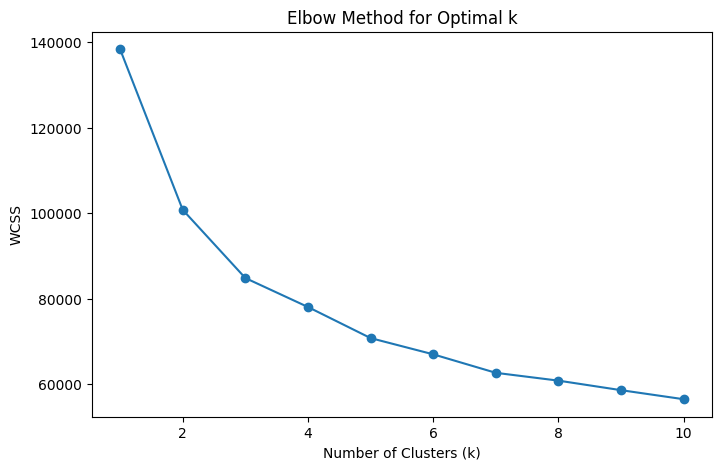

In [3]:
# I used Elbow Method to determine the number of cluster which is 3
wcss = [KMeans(n_clusters=k, random_state=42).fit(X_scaled).inertia_ for k in range(1, 11)]

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [4]:
# I applied K-means to the normalized data k=3 and assigned cluster labels
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_names = {
    0: "Gameplay Stats",
    1: "Economic Indicators",
    2: "Team Objectives"
}
data['Cluster Name'] = data['Cluster'].map(cluster_names)

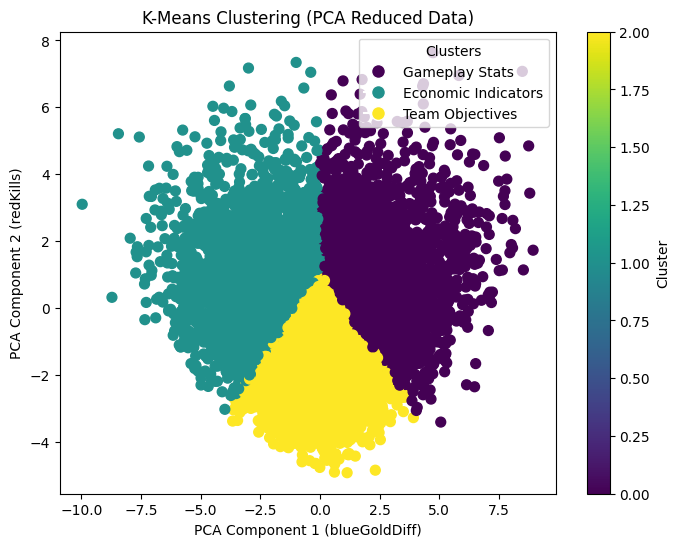

In [5]:
# I used PCA for visualization to reduce the feature dimension to 2 it identified the most significant features contributing to PCA components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

feature_contributions = pd.DataFrame(
    pca.components_,
    columns=selected_features,
    index=["PCA Component 1", "PCA Component 2"]
)

top_features_pca1 = feature_contributions.loc["PCA Component 1"].idxmax()
top_features_pca2 = feature_contributions.loc["PCA Component 2"].idxmax()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title("K-Means Clustering (PCA Reduced Data)")
plt.xlabel(f"PCA Component 1 ({top_features_pca1})")
plt.ylabel(f"PCA Component 2 ({top_features_pca2})")
plt.colorbar(scatter, label="Cluster")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / 2), markersize=10)
                    for i in range(optimal_k)],
           labels=[cluster_names[i] for i in range(optimal_k)], title="Clusters", loc='upper right')
plt.show()

Cluster Centroids:
    blueKills  blueDeaths  blueAssists  redKills  redDeaths  redAssists  \
0   1.095769   -0.333999     0.987839 -0.333999   1.095769   -0.300052   
1  -0.363401    1.073670    -0.339319  1.073670  -0.363401    0.950725   
2  -0.566696   -0.584690    -0.501666 -0.584690  -0.566696   -0.514393   

   blueTotalGold  redTotalGold  blueGoldDiff  redGoldDiff  blueDragons  \
0       1.099633     -0.526118      1.007933    -1.007933     0.343785   
1      -0.544477      1.096211     -1.006927     1.006927    -0.329502   
2      -0.427268     -0.452945      0.007844    -0.007844    -0.008290   

   blueHeralds  redDragons  redHeralds  
0     0.158545   -0.372067   -0.176216  
1    -0.166889    0.318586    0.173811  
2     0.007922    0.038881    0.000382  


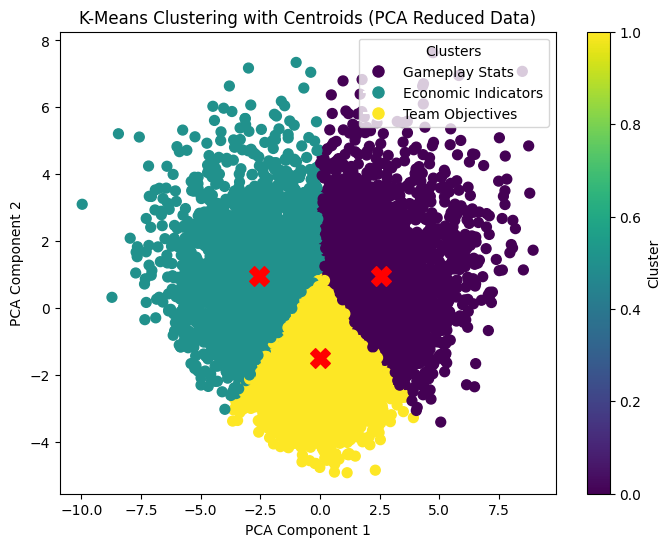

In [6]:
# I analyzed and visualize the cluster centroids
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=selected_features)
print("Cluster Centroids:\n", cluster_centers)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
            marker='X', s=200, c='red', label='Centroids')
plt.title("K-Means Clustering with Centroids (PCA Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i / 2), markersize=10)
                    for i in range(optimal_k)],
           labels=[cluster_names[i] for i in range(optimal_k)], title="Clusters", loc='upper right')
plt.show()

Average Win Rate by Cluster Name:
 Cluster Name
Economic Indicators    0.221854
Gameplay Stats         0.768590
Team Objectives        0.506477
Name: blueWins, dtype: float64


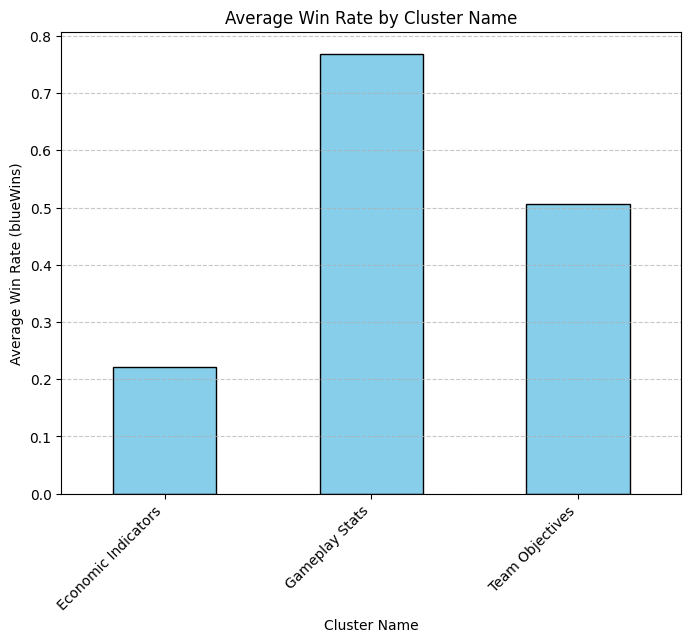

In [ ]:
# Analyze average win rates by cluster
cluster_win_rate = data.groupby('Cluster Name')['blueWins'].mean()
print("Average Win Rate by Cluster Name:\n", cluster_win_rate)

# Visualize win rates
plt.figure(figsize=(8, 6))
cluster_win_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Win Rate by Cluster Name")
plt.xlabel("Cluster Name")
plt.ylabel("Average Win Rate (blueWins)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("Dataset size:", data.shape)

Dataset size: (9879, 42)


In [7]:
# Define output file path in Google Drive
output_file_path = "/content/drive/My Drive/ADV. ML Activities/high_diamond_ranked_10min_clustered.csv"

# Save the dataset with cluster labels
data.to_csv(output_file_path, index=False)

print(f"Clustered dataset saved to: {output_file_path}")


Clustered dataset saved to: /content/drive/My Drive/ADV. ML Activities/high_diamond_ranked_10min_clustered.csv
